For the decision trees you should visualize at least two trees (using code we saw in class) at different maximum depths. Discuss the effect the depth has on bias and variance. Discuss the choices the algorithm makes in which attributes to split on. For example, at a given tree level do all nodes split on the same attribute? Why or why not?

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
# https://github.com/thatsmellything/cs5830_project8
df = pd.read_csv('weatherAUS.csv')

binary = ['RainToday', 'RainTomorrow']
direction = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical = ['Location']
numerical = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Evaporation', 'Sunshine', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
date = ['Date'] 

windDir = {
    'N': 0, 'NNE': 22.5, 'NE': 45,
    'ENE': 67.5, 'E': 90, 'ESE': 112.5,
    'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225,
    'WSW': 247.5, 'W': 270, 'WNW': 292.5,
    'NW': 315, 'NNW': 337.5
}
def circleEncoding(direction):
    if (direction not in windDir):
        return (0, 0)
    num = windDir[direction]
    angle = np.deg2rad(num)
    return round(np.cos(angle), 3), round(np.sin(angle), 3)

columns = set(df.columns.values)
print(f"are all the columns in the dataframe: {columns == set(categorical + numerical + date)}")
print(f"columns that are not in the dataframe: {columns - set(categorical + numerical + date)}")


are all the columns in the dataframe: False
columns that are not in the dataframe: {'RainToday', 'RainTomorrow', 'WindDir3pm', 'WindGustDir', 'WindDir9am'}


In [3]:
""" Standardize the numerical columns and one-hot encode the categorical columns.
    convert the binary columns to 0 and 1. And convert the date column to datetime."""

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df[numerical] = df[numerical].fillna(0)
df[numerical] = df[numerical].astype('float16')

df[binary] = df[binary].replace({'No': 0, 'Yes': 1})

# df = pd.get_dummies(df, columns=categorical)
df = df.drop(columns=categorical)

df['Date'] = pd.to_datetime(df['Date']).dt.month
df = df.rename(columns={'Date': 'Month'})

for col in direction: # Apply circle encoding and return the sin and cos values into features
    df[col + '_cos'], df[col + '_sin'] = zip(*df[col].apply(circleEncoding))
df = df.drop(columns=direction)

df = df.dropna()

#display(df.info())
df.to_csv('weatherAUS_cleaned.csv', index=False)

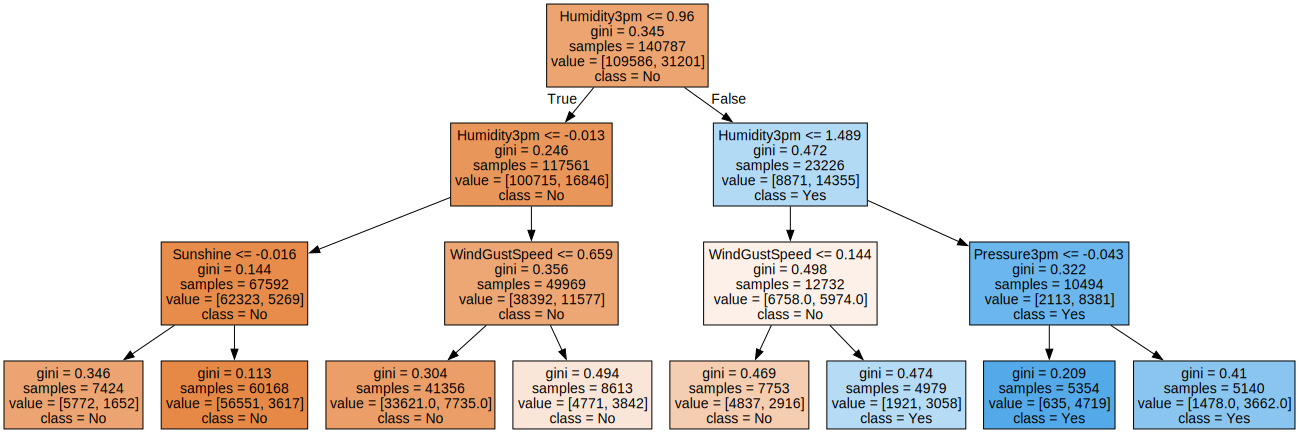

'tree.png'

In [4]:
feature_cols = [col for col in df.columns if col != 'RainTomorrow']

X = df[feature_cols]
y = df['RainTomorrow']

# fit classification tree with max_depth=3 on all data

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

graph = Source(tree.export_graphviz(treeclf, out_file=None, feature_names=feature_cols, class_names=['No', 'Yes'], filled = True))
display(SVG(graph.pipe(format='svg')))
graph.render('tree', format='png', cleanup=True)



In [5]:
pd.DataFrame({'feature': feature_cols, 'importance': treeclf.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
10,Humidity3pm,0.863204
6,WindGustSpeed,0.098896
5,Sunshine,0.026514
12,Pressure3pm,0.011386
14,Cloud3pm,0.000000
22,WindDir3pm_cos,0.000000
21,WindDir9am_sin,0.000000
20,WindDir9am_cos,0.000000
19,WindGustDir_sin,0.000000
18,WindGustDir_cos,0.000000
